<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import seaborn

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') #в файле использовался не стандартный разделитель

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [5]:
data.isna().mean().round(3)

total_images            0.000
last_price              0.000
total_area              0.000
first_day_exposition    0.000
rooms                   0.000
ceiling_height          0.388
floors_total            0.004
living_area             0.080
floor                   0.000
is_apartment            0.883
studio                  0.000
open_plan               0.000
kitchen_area            0.096
balcony                 0.486
locality_name           0.002
airports_nearest        0.234
cityCenters_nearest     0.233
parks_around3000        0.233
parks_nearest           0.659
ponds_around3000        0.233
ponds_nearest           0.616
days_exposition         0.134
dtype: float64

Как можно заметить, в некоторых столбцах имеется достаточно большое количество пропущенных значений, особенно в столбце "is_apartment", в котором доля пропусков около 90%.

Пропуски в столбцах "parks_around3000", "parks_nearest", "ponds_around3000", "ponds_nearest" необязательно учитывать и исправлять, в связи с их ненадобностью.

Пропуски в столбце "ceiling_height" необходимо рассмотреть подробнее , ведь этот параметр очень важен в объявлении. 

Причина пропусков в столбце "balcony" предположительно связана с отсутствием балконов. 

Столбец "days_exposition" имеет некоторые пропуски, предполагаю, что эти пропуски обусловлены тем, что объявление еще действует(не снято).

К пропускам столбцов "kitchen_area" и "living_area" потребуется присмотреться, т.к. параметр важный.

<b>Этажность дома не указана только в 86 строках, доля мала и ей можно будет пренебречь, тк пропущенных данных в них много</b>

В 49 строчках отсутствует название населенного пункта, количество малое, но параметр важный.

In [6]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [7]:
for column in data.columns:
    print(data[column].value_counts())
    print()

10    1798
9     1725
20    1694
8     1585
7     1521
6     1482
11    1362
5     1301
12    1225
0     1059
13    1015
14     986
4      986
15     948
1      872
3      769
16     761
17     650
18     642
2      640
19     603
23      16
21      12
24       8
22       8
26       5
28       4
32       4
50       3
29       3
31       2
35       2
30       2
27       2
37       1
39       1
25       1
42       1
Name: total_images, dtype: int64

4500000.0     342
3500000.0     291
4000000.0     260
4300000.0     260
4200000.0     259
             ... 
4412094.0       1
6416000.0       1
4581000.0       1
34551000.0      1
6029433.0       1
Name: last_price, Length: 2978, dtype: int64

45.00     419
42.00     383
60.00     347
31.00     346
44.00     345
         ... 
45.85       1
44.18       1
59.83       1
127.20      1
23.55       1
Name: total_area, Length: 2182, dtype: int64

2018-02-01T00:00:00    368
2017-11-10T00:00:00    240
2017-10-13T00:00:00    124
2017-09-27T00:00:00    

Аномальные значения содержатся в столбце 'ceiling_height', к остальным значениям претензий не выявлено.

In [8]:
data.query('ceiling_height>6')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.0,5.0,32.0,2,False,...,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,NaN,...,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3474,3,1400000.0,30.0,2018-03-16T00:00:00,1,8.0,5.0,15.3,2,False,...,7.3,NaN,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
4643,0,4300000.0,45.0,2018-02-01T00:00:00,2,25.0,9.0,30.0,2,NaN,...,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27T00:00:00,0,27.0,25.0,17.0,17,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.0,5.0,19.5,1,True,...,5.5,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000.0,54.0,2017-10-13T00:00:00,2,27.0,5.0,30.0,3,NaN,...,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5669,4,4400000.0,50.0,2017-08-08T00:00:00,2,26.0,9.0,21.3,3,NaN,...,7.0,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.0,36.0,41.0,13,NaN,...,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
5863,20,5650000.0,45.0,2018-08-15T00:00:00,1,8.3,16.0,19.3,14,NaN,...,8.3,1.0,Санкт-Петербург,13069.0,10763.0,0.0,NaN,1.0,613.0,14.0


### Вывод

В результате изучения данных, были выявлены некоторые проблемы, требующие решения. Необходимо избавиться от пропущенных значений в планировках квартир и пропусков в столбце балкона. Так же потребуется решить, что делать с аномально высокими потолками. Столбец с датой и временем не вызывает вопросов, но значение времени в столбце всегда 0:00:00, поэтому можно будет отбросить эту часть столбца. <b>Пропуски в столбце "total_floors" удалим, т.к. доля их мала и другие столбцы в них имеют пропуски. Столбцы "площадей" будем заполнять медианным значением сгруппированных по количеству комнат квартир и удалим некорректные заполнения.</b> Остальные столбцы будем рассматривать по необходимости. 

## Предобработка данных

In [9]:
#Замена пропусков в столбцах с планировкой, считаем что пропуск это отрицание выбранного пункта
for column in ['is_apartment', 'open_plan', 'studio']:
    data[column] = data[column].fillna(False)

In [10]:
#Замена пропусков данных в столбце количества балконов, считаем пропуск отсутствием балкона -> 0
data['balcony'] = data['balcony'].fillna(0)
#Удаление пропусков floors_total
data = data.dropna(subset=['floors_total'])

In [11]:
#замена аномально высоких потолков на медианное значение
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height']<6,data['ceiling_height'].median())

In [12]:
#Удалим пропущенные строчки в населенном пункте, их очень мало
data = data.dropna(subset=['locality_name'])

<b> Переместил подстановку значений кухни раньше, чтобы отловить все случаи, когда кухня с жилой площадью будут больше общей

In [13]:
#Проверим пропуски в кухни, соответствуют ли они открытой планировке или студии
display(data.query('kitchen_area.isna() and open_plan==True'))
data.query('kitchen_area.isna() and studio==True')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
349,4,2320000.0,25.0,2017-09-27T00:00:00,0,2.65,14.0,17.0,1,False,...,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
508,0,3375000.0,34.4,2017-03-28T00:00:00,0,2.65,26.0,24.3,19,False,...,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
780,9,2600000.0,26.1,2018-02-20T00:00:00,0,2.65,18.0,NaN,8,False,...,NaN,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
839,14,1900000.0,35.0,2017-04-14T00:00:00,0,2.70,5.0,15.0,3,False,...,NaN,1.0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.0
946,5,2200000.0,23.0,2016-09-27T00:00:00,0,2.65,27.0,18.0,7,False,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,483.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21299,13,2450000.0,28.5,2017-11-22T00:00:00,0,2.65,12.0,18.0,7,False,...,NaN,2.0,Санкт-Петербург,20381.0,19383.0,0.0,NaN,1.0,579.0,73.0
21628,9,3900000.0,34.0,2017-03-18T00:00:00,0,2.65,20.0,24.0,10,False,...,NaN,2.0,Санкт-Петербург,15506.0,13615.0,0.0,NaN,1.0,767.0,320.0
22573,8,2250000.0,24.0,2017-09-28T00:00:00,0,2.65,12.0,15.0,3,False,...,NaN,2.0,городской посёлок Новоселье,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23442,0,2500000.0,27.7,2017-09-28T00:00:00,0,2.65,24.0,18.0,4,False,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,2.65,24.0,15.50,2,False,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,2.65,17.0,24.75,4,False,...,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,2.65,10.0,NaN,7,False,...,NaN,0.0,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
697,12,2500000.0,24.10,2017-12-01T00:00:00,0,2.75,25.0,17.50,21,False,...,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.0
716,5,1500000.0,17.00,2017-06-07T00:00:00,0,2.70,9.0,12.00,1,False,...,NaN,0.0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22867,8,3090000.0,30.00,2017-12-17T00:00:00,0,2.65,25.0,18.20,5,False,...,NaN,0.0,Санкт-Петербург,35250.0,16414.0,0.0,NaN,1.0,400.0,211.0
22877,2,4280000.0,28.00,2017-10-26T00:00:00,0,2.70,19.0,18.00,10,False,...,NaN,0.0,Санкт-Петербург,18982.0,7206.0,0.0,NaN,1.0,415.0,151.0
23210,7,3200000.0,26.00,2017-09-01T00:00:00,0,2.65,25.0,18.00,16,False,...,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23554,15,3350000.0,26.00,2018-09-07T00:00:00,0,2.65,19.0,NaN,8,False,...,NaN,0.0,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0


In [14]:
# 213 пропусков и все находятся в категории 0 комнат, что соответствует студии или открытой планировке
# Обычно в таких квартирах указывают примерно 5 квадратных метров на кухню
data['kitchen_area'] = data['kitchen_area'].fillna(5)

In [15]:
#Производим замену пропусков на сгруппированные медианы
data['living_area'] = data['living_area'].fillna(data.groupby('rooms')['living_area'].transform("median"))
data['kitchen_area'] = data['kitchen_area'].fillna(data.groupby('rooms')['kitchen_area'].transform("median"))

In [16]:
# Удаление некорректных значений жилой площади
data = data.drop(data.query('living_area + kitchen_area > total_area')['living_area'].index)

In [17]:
#код ревьюера
print('Жилая площадь > общая:', data[data['living_area'] > data['total_area']].shape[0])
print('Жилая площадь + кухня > общая:', (data[(data['living_area'] + data['kitchen_area']) > data['total_area']].shape[0]))

Жилая площадь > общая: 0
Жилая площадь + кухня > общая: 0


In [18]:
#переводим комнаты в целочисленные, т.к. не может быть половина комнаты
data['rooms'] = data['rooms'].astype('int')
# так же цены у нас указаны без дробных частей, человеческое восприятие сейчас немножечко восторжествует 
data['last_price'] = data['last_price'].astype('int')
# балконы тоже не хотят быть дробными
data['balcony'] = data['balcony'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')

In [19]:
#переводим в удобный формат времени
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23399 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23399 non-null int64
last_price              23399 non-null int64
total_area              23399 non-null float64
first_day_exposition    23399 non-null datetime64[ns]
rooms                   23399 non-null int64
ceiling_height          23399 non-null float64
floors_total            23399 non-null int64
living_area             23399 non-null float64
floor                   23399 non-null int64
is_apartment            23399 non-null bool
studio                  23399 non-null bool
open_plan               23399 non-null bool
kitchen_area            23399 non-null float64
balcony                 23399 non-null int64
locality_name           23399 non-null object
airports_nearest        17938 non-null float64
cityCenters_nearest     17961 non-null float64
parks_around3000        17962 non-null float64
parks_nearest           7987 non-null float64
ponds_around30

Требуемая предобработка данных произведена, значимые столбцы приведены к правильным типам. Удалил небольшое количество строк с пропусками, на конечном результате не отразится, потому что число маленькое. <b>Заменил пропущенные данные в рассчетах жилой площади и кухни на медиану по группировке комнат и удалил некорректные по соотношению жилой площади + кухни к общей.</b> Заполнил пропуски балконов, исходя из логики клиента "нет балкона пропускаем пункт". Заменил очень высокие потолки на медиану. Убрал пропуски в столбцах апартаментов, открытой планировки и студии, по принципу: пропуск соответсвует отрицанию пункта. Не стал убирать нарушение стиля в некоторых столбцах, потому что использоваться они не будут, кроме столбца с удаленностью от центра

<b> Вероятнее всего пропуски площади могли возникнуть из-за сбоев, т.к. в большинстве из них в других столбцах были пропуски, либо кто-то пытался удалить из объявления эту информацию. Площадь кухни чаще не указывали в свободных планировках. Аномально высокие потолки могут быть и сбоем, либо же нарочной "опиской" для увеличения стоимости. Автоматические столбцы с расстоянием и парками и прудами вероятнее всего не замерялись, поэтому и отсутствуют.

## Расчёты и добавление результатов в таблицу

In [21]:
#Добавление столбца стоимости за квадратный метр, округленного до 3 знаков
data['cost_sq_meter'] = round(data['last_price']/data['total_area'],3)

In [22]:
# напишем функцию принимающую строку на вход и выдающую категорию этажа
def category_floor(row):
    if row['floor']!=row['floors_total'] and row['floor']==1:
        return('первый')
    elif row['floor']==row['floors_total']:
        if row['floor']==1:
            return('первый')
        else:
            return('последний')
    else:
        return('другой')

data['category_floor'] = data.apply(category_floor,axis=1)

In [23]:
data['category_floor'].value_counts()

другой       17221
последний     3303
первый        2875
Name: category_floor, dtype: int64

In [24]:
#Добавление столбца отношения жилой площади к общей, округленного до 3 знаков
data['living_to_total'] = round(data['living_area']/data['total_area'],3)

In [25]:
#Добавление столбца отношения площади кухни к общей, округленного до 3 знаков
data['kitchen_to_total'] = round(data['kitchen_area']/data['total_area'],3)

In [26]:
#Добавление столбца с днем недели
data['exp_day'] = data['first_day_exposition'].dt.weekday

In [27]:
#Добавление столбца с месяцем
data['exp_month'] = data['first_day_exposition'].dt.month

In [28]:
#Добавление столбца с годом
data['exp_year'] = data['first_day_exposition'].dt.year

In [29]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,cost_sq_meter,category_floor,living_to_total,kitchen_to_total,exp_day,exp_month,exp_year
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,2.0,755.0,NaN,120370.370,другой,0.472,0.231,3,3,2019
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,0.0,NaN,81.0,82920.792,первый,0.460,0.272,1,12,2018
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,2.0,574.0,558.0,92785.714,другой,0.612,0.148,3,8,2015
3,0,64900000,159.00,2015-07-24,3,2.65,14,45.00,9,False,...,3.0,234.0,424.0,408176.101,другой,0.283,0.031,4,7,2015
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,1.0,48.0,121.0,100000.000,другой,0.320,0.410,1,6,2018
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,NaN,NaN,55.0,95065.789,другой,0.474,0.299,0,9,2018
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,0.0,NaN,155.0,99195.710,другой,0.284,0.386,3,11,2017
7,5,7915000,71.60,2019-04-18,2,2.65,24,30.50,22,False,...,0.0,NaN,NaN,110544.693,другой,0.426,0.264,3,4,2019
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,NaN,NaN,189.0,87454.765,другой,0.465,0.266,2,5,2018
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,0.0,NaN,289.0,88524.590,другой,0.715,0.107,6,2,2017


Требующиеся для последующиего анализа столбцы созданы, можно рассматривать взаимосвязи в данных.

## Исследовательский анализ данных

In [30]:
#Напечатать сразу много графиков можно такой командой, но для качественного рассмотрения таких данных 
# стандартные параметры не подходят, т.к. не отражают действительности некоторых столбцов
#for i in ['ceiling_height','days_exposition','rooms', 'last_price', 'total_area']:
#    data.hist(i,bins=100)
#Поэтому я подробно рассмотрю каждый график с отдельно подобранными параметрами

52.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd3f6e0550>]],
      dtype=object)

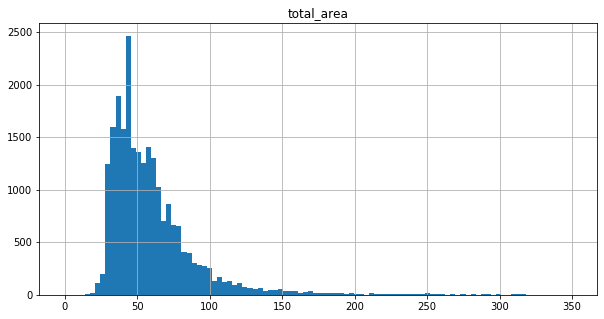

In [31]:
display(data['total_area'].median())
data.hist('total_area', bins=100, range=(0,350), figsize=(10,5))

4650000.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd3eb51e10>]],
      dtype=object)

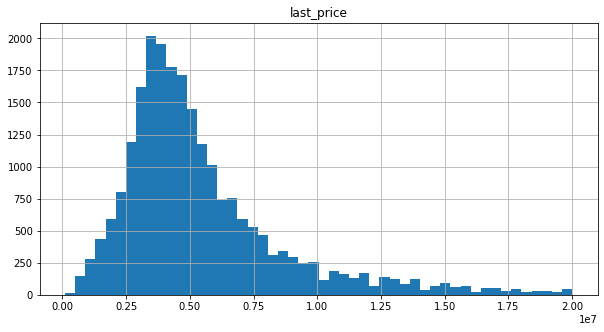

In [32]:
display(data['last_price'].median())
data.hist('last_price', bins=50, range=(100000,20000000), figsize=(10,5))

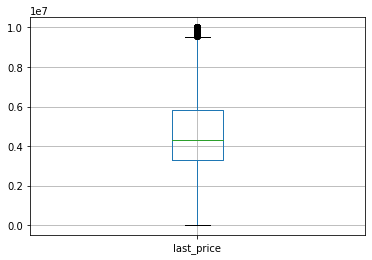

In [33]:
data.query('last_price<10000000').boxplot('last_price')

2.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd3e9d34d0>]],
      dtype=object)

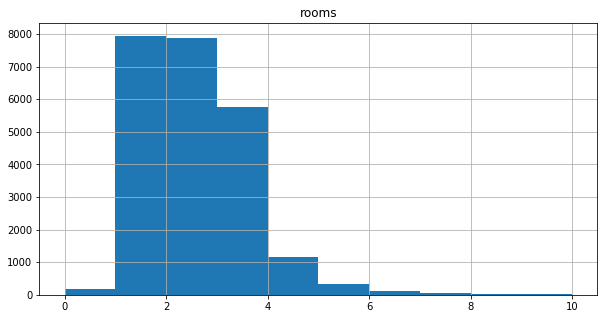

In [34]:
display(data['rooms'].median())
data.hist('rooms', bins=10, range=(0,10), figsize=(10,5))

2.65

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd3e99f250>]],
      dtype=object)

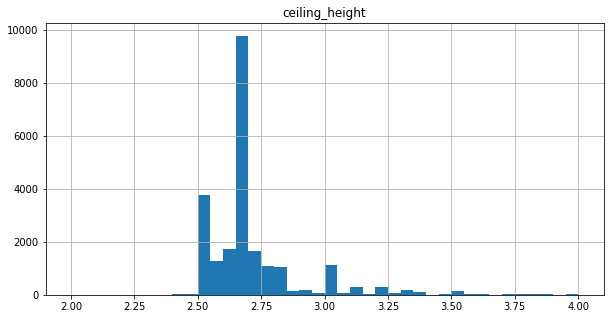

In [35]:
display(data['ceiling_height'].median())
data.hist('ceiling_height', bins=40, range=(2,4), figsize=(10,5))

Медиана = 96.0, среднее = 181.21544313802983


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd3e859190>]],
      dtype=object)

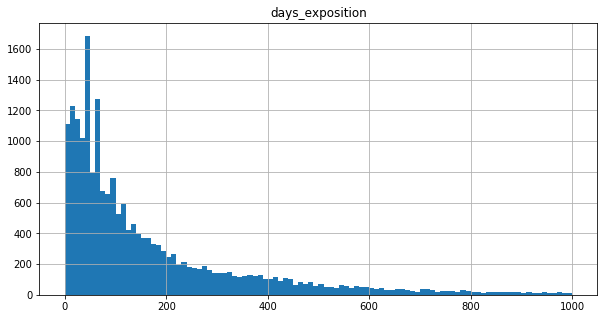

In [36]:
print('Медиана = {}, среднее = {}'.format(data['days_exposition'].median(),data['days_exposition'].mean()))
data.hist('days_exposition', bins=100, figsize=(10,5), range=(0,1000))

Внимательно изучив предыдущие графики, можно сказать, что выбивающиеся значения имеются только в цене и количестве дней обьявления, но удалять стоит только объявления с ценой, количество дней не так сильно влияет на нашу оценку.

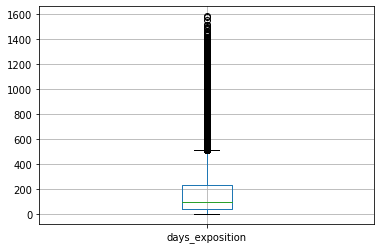

In [37]:
data.boxplot('days_exposition')

На 550 располежена крайняя граница до выбросов, рассмотрим срез до этой границы

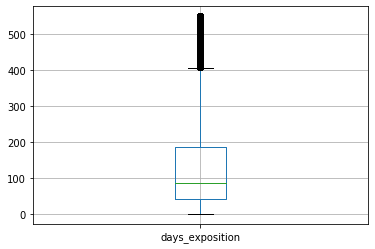

In [38]:
#Уменьшаем количество выбивающегося шума, чтобы оценить длительный период продажи квартиры
data.query('days_exposition<550').boxplot('days_exposition')

<b>Видно, что теперь максимальное значение 400, что может объяснить большее количество наблюдений. Можно предположить что продажа затянулась, если объявление находится большее 400 дней.По первому квартилю:</b> 45 дней, как раз наибольшая частота объявлений снятых с продажи в этом промежутке. Поэтому быструю продажу можно считать раньше 45 дней. Обычно можно наблюдать продажу квартир в промежутке от 50 до 200 дней, что согласуется с медианой и средним по нашей выборке и отражаеся на графике.

In [39]:
# Удаление выбивающихся значений
data = data.query('days_exposition<550 and rooms<12 and total_area<450 and ceiling_height > 2.5')

Объявления висящие больше 550 дней оцениваются как выбросы. Больше 12 комнат это редкость, поэтому можно срезать. Квартир с площадью больше 450 квадратных метров очень мало. По цене не будем производить никаких изменений, т.к. может быть полезно для определения плохих/хороших квартир. Сократим долю квартир с потолками ниже 2.5 метров.

In [40]:
#код ревьюера
data.query('ceiling_height > 4.5 or ceiling_height < 2.5').shape[0]

6

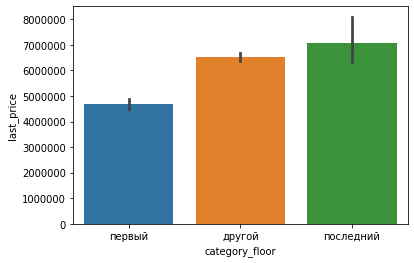

In [41]:
seaborn.barplot(x='category_floor',y='last_price',data=data)

In [42]:
data.pivot_table(index='category_floor', values='last_price')

,last_price
category_floor,
другой,6.531188e+06
первый,4.674917e+06
последний,7.057173e+06


Последний этаж оценивается гораздо дороже, чем первый. Есть взаимосвязь между ценой квартиры и этажем. Если увеличивается этаж, то увеличивается и стоимость квартиры.

In [43]:
#Оценим корреляцию требуемых параметров
data_good = data[['last_price','total_area','rooms','cityCenters_nearest','first_day_exposition','category_floor']]

                     last_price  total_area     rooms  cityCenters_nearest
last_price             1.000000    0.593204  0.344594            -0.194964
total_area             0.593204    1.000000  0.787289            -0.230297
rooms                  0.344594    0.787289  1.000000            -0.191689
cityCenters_nearest   -0.194964   -0.230297 -0.191689             1.000000


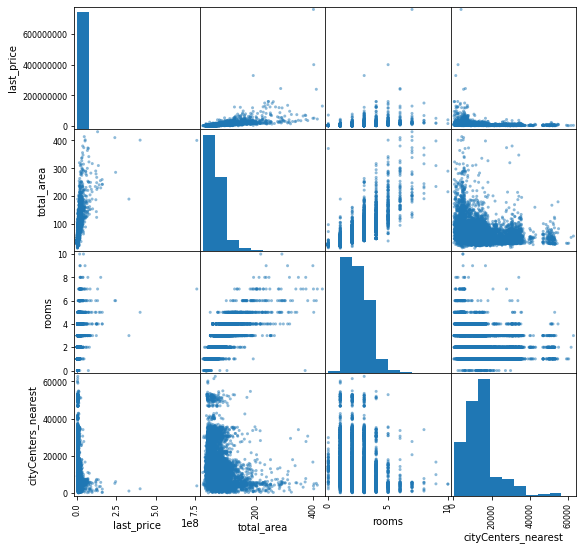

In [44]:
pd.plotting.scatter_matrix(data_good,figsize=(9,9))
print(data_good.corr())

Имеются взаимосвязанные 2 фактора, влияющих на стоимость, это площадь и количество комнат.

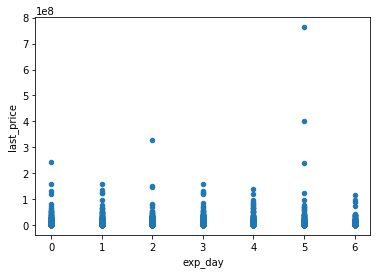

In [45]:
data.plot(x='exp_day', y='last_price', kind='scatter')

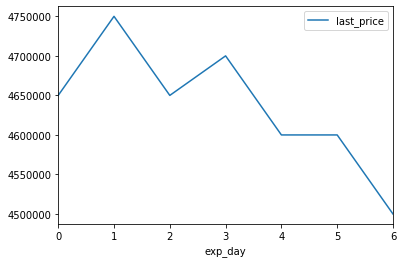

In [46]:
data.pivot_table(index='exp_day', values='last_price', aggfunc='median').plot()

<b>Стоимость квартиры имеет примерно одинаковое отклонение в каждый из дней, но имеются дни когда цена станосится незначительно ниже. Связь очень слабая, почти отсутвует.

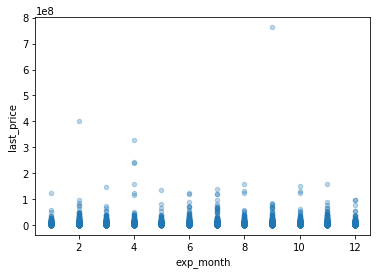

In [47]:
data.plot(x='exp_month', y='last_price', kind='scatter', alpha=0.3)

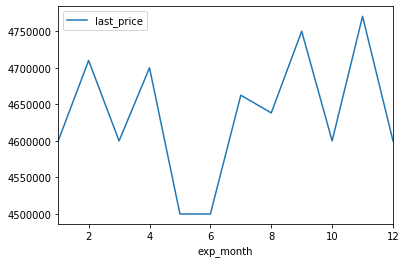

In [48]:
data.pivot_table(index='exp_month', values='last_price', aggfunc='median').plot()

Отклонения величин между месяцами почти одинаковые, но имеется слабая связь цены и месяца. Квартиры выставляли дешевле в мае и июне

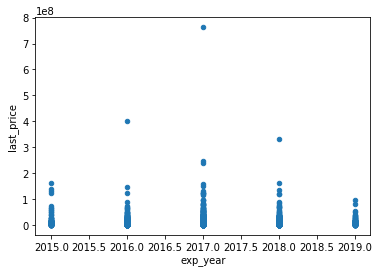

In [49]:
data.plot(x='exp_year', y='last_price', kind='scatter')

Имелась тенденция на повышение цены с 2014 по 2017,после последовал спад. Предпологается, что имеется связь между годом и ценой, но она обусловлена еще какими-то зависимостями.

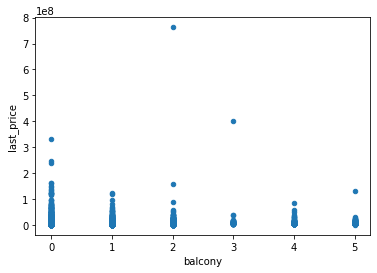

In [50]:
data.plot(x='balcony', y='last_price', kind='scatter')

Чем меньше балконов, тем дороже квартира

In [51]:
#Разберем  10 самых популярных районов по объявлениям
t = data['locality_name'].value_counts().head(10).index
data.query('locality_name in @t').pivot_table(index='locality_name',
                                              values='cost_sq_meter').sort_values('cost_sq_meter', ascending=False)

,cost_sq_meter
locality_name,
Санкт-Петербург,113680.684280
Пушкин,103787.414536
деревня Кудрово,92650.207373
посёлок Парголово,89299.659227
посёлок Мурино,85697.896797
посёлок Шушары,77762.171162
Колпино,74871.092878
Всеволожск,69143.391062
Гатчина,67809.889482


Что и следовало ожидать, самая большая стоимость квадратного метра в Санкт-Петербурге и самый дешевый из нашей десятки в Выборге.

,last_price
center_km,
0,2.896125e+07
1,1.804152e+07
2,1.619110e+07
3,1.012499e+07
4,1.159864e+07
5,1.224312e+07
6,1.372208e+07
7,1.337104e+07
8,8.898008e+06


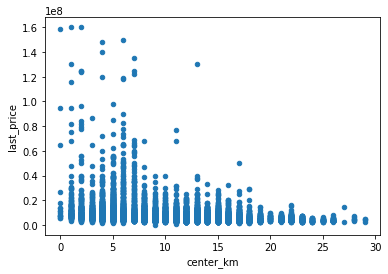

In [52]:
#Создадим выборку по Питеру и уберем выбивающиеся цены, плюс заполним пропуски в удаленности от центра медианой, тк их мало
spb_data = data.query('locality_name=="Санкт-Петербург" and last_price<200000000').fillna(data['cityCenters_nearest'].median())
#Создадим целочисленный столбец с удаленностью от центра
spb_data['center_km'] = round(spb_data['cityCenters_nearest']/1000).astype('int')
#Рассчитаем среднюю стоимость каждого километра от центра и рассмотрим график распределения
display(spb_data.pivot_table(index='center_km',values='last_price', aggfunc='mean'))
spb_data.plot(x='center_km', y='last_price',kind='scatter')

Центральная зона в Питере лежит в радиусе 6 километров.

Рассмотрим подробнее центральную зону Питера: проверим отличаются ли значения от общей выборки.

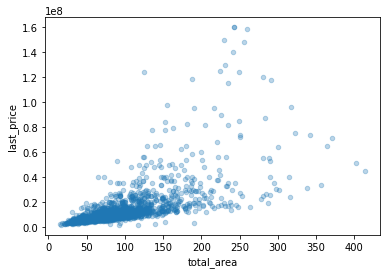

In [53]:
spb_data_center = spb_data.query('center_km<=6')
spb_data_center.plot('total_area','last_price',kind='scatter', alpha=0.3)

Наблюдается сильная корреляция стоимости квартиры от площади.

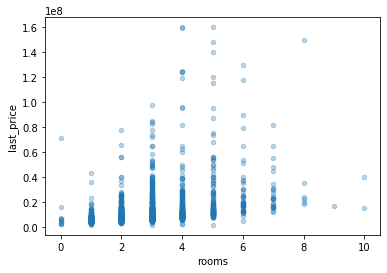

In [54]:
spb_data_center.plot('rooms','last_price',kind='scatter', alpha=0.3)

Количество комнат имеет сильное влияние на стоимость квартиры, но после 3 комнат связь имеет менее выраженное влияние. Количество комнат зависит от площади квартиры. 

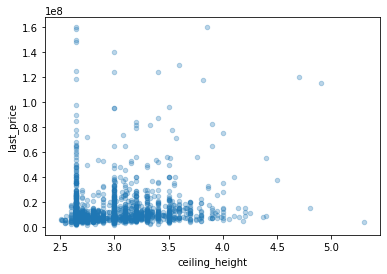

In [55]:
spb_data_center.plot('ceiling_height','last_price',kind='scatter', alpha=0.3)

Присутсвует слабая связь между высотой потолка и стоимостью. Чаще всего квартиры имеют потолок окло 2,7 метра.

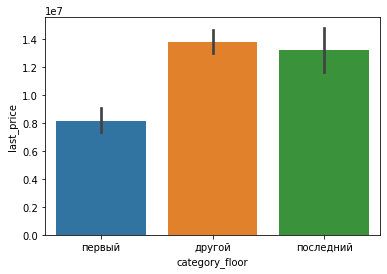

In [56]:
seaborn.barplot(x='category_floor',y='last_price',data=spb_data_center)

<b>Связь между этажем и стоимостью частично подтверждается и для квартир в центре Питера. Первый этаж остался дешевле остальных, но в центре Питера последний этаж стал цениться меньше

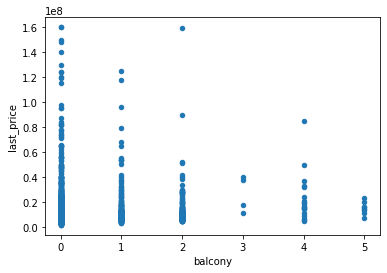

In [57]:
spb_data_center.plot(x='balcony', y='last_price', kind='scatter')

Подтверждается тенденция на падение стоимости при наличии балконов.

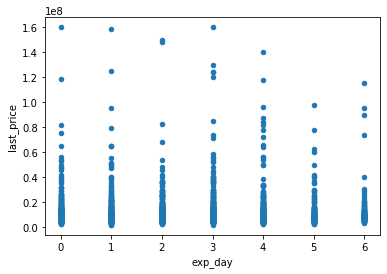

In [58]:
spb_data_center.plot(x='exp_day', y='last_price', kind='scatter')

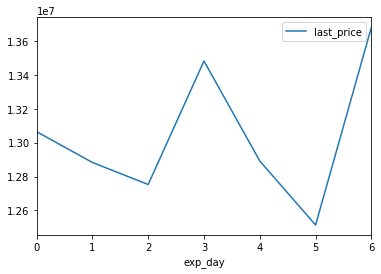

In [59]:
spb_data_center.pivot_table(index='exp_day', values='last_price').plot()

<b>Как можно заметить, цена распределяется равномерно во все дни, кроме воскресенья и четверга, в эти дни цены устанавлиюват выше.

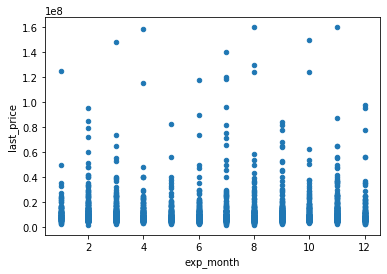

In [60]:
spb_data_center.plot(x='exp_month', y='last_price', kind='scatter')

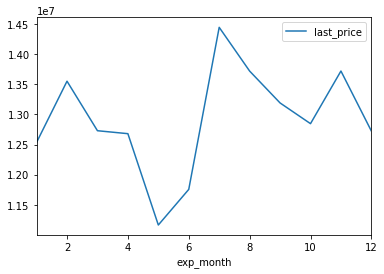

In [61]:
spb_data_center.pivot_table(index='exp_month', values='last_price').plot()

<b>В ноябре, июле и феврале цены устанавливают выше, чем в остальные месяцы. А самые дешевые квартиры обычно в апреле и июне.

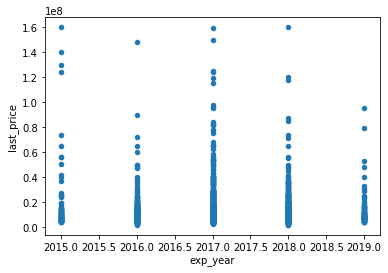

In [62]:
spb_data_center.plot(x='exp_year', y='last_price', kind='scatter')

После 2014 года появилась тенденция к увелечению стоимости квартир год к году, но она закончилась после 2017 и цены пошли на спад.

Исходя из полученных данных, сильного различия взаимосвязей между центральной зоной Питера и общей картины по всем населнным пунктам не наблюдается.

## Общий вывод

В ходе исследования была произведена обработка данных и анализ, который подтверждает некоторые гипотезы о взаимосвязях:
*  На стоимость кваритры прямо влияет ее общая площадь и количество комнат соответственно.
*  При выставлении квартиры на продажу стоит учитывать месяц и год. День недели не сильно коррелирует с стоимостью. Но эти параметры подвержены влиянию других внешних факторов.
*  Между ценой квартиры и высотой потолков присутствует взаимосвязь. Чем выше потолки, тем дороже квартира, но стоимость большинства квартир с потолками 2,7 метра зависит от других факторов.
*  Выявлена связь стоимости квартиры  с удаленностью от центральной зоны Питера, квартиры находящиеся в центральной зоне стоят дороже. В других населенных пунктах все аналогично, все что удалено от Питера и центра стоит дешевле.
*  Стоимость квартиры зависит от этажа: чем выше расположена квартира, тем она дороже.
*  Формирование стоимости квартир подчиняется одинаковым правилам независимо от населенного пункта.

Наиболее влияющие на стоимость параметры: площадь квартиры, количество комнат, высота потолков, этаж, удаленность от центра города. Не такие важные, но влияющие параметры: месяц и год, отсутсвие балкона.

## Чек-лист готовности проекта

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: «Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?»
- [x]  выполнено задание: «Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили».
- [x]  выполнено задание: «Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года». 
- [x]  выполнено задание: «Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце `locality_name`».
- [x]  выполнено задание: «Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (`locality_name`). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона».
- [x]  выполнено задание: «Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?»
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод